## 시각화

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('AI_patent_test.csv',  encoding='utf-8-sig')

In [20]:
df

,number,year,title,abs,claims,ipc,country,assignee,backward
0,11856881,2024,"Detection of plant diseases with multi-stage, ...",A computer system is provided comprising a cla...,13,"G06V020, A01B079, G06N003, G06T007, G06T003, G...",US,CLIMATE LLC,"8712148, 8738243, 8767194, 9922405, 10255670, ..."
1,11857271,2024,Markerless navigation using AI computer vision,"Provided herein are devices, systems, and meth...",20,"G06T007, G06N003, A61B034, A61B090, G06T007",NaN,NaN,NaN
2,11857288,2024,Systems and methods for phase unwrapping for d...,A method of cardiac strain analysis uses displ...,17,"G06T007, A61B005, A61B005, G06T007, G16H030, G...",US,UNIVERSITY OF VIRGINIA PATENT FOUNDATION,"10335037, 10524687"
3,11857323,2024,System and method for camera-based stress dete...,A system and method for camera-based stress de...,18,"G06K009, A61B005, G16H050, A61B005, A61B005, A...",CA,NURALOGIX CORPORATION,"6102846, 6126595, 8219438, 8540629, 9693696, 1..."
4,11857841,2024,Performance monitoring system for a pitcher,A performance monitoring system includes a pit...,11,"A63B069, A63B024, A63B071",NaN,NaN,"4925186, 6616556, 8308615, 8381601, 9022884"
...,...,...,...,...,...,...,...,...,...
10165,12185129,2024,Utilizing invariant user behavior data for tra...,A device may receive mobile radio data identif...,20,"H04W024, G06N005, H04W016, H04W024",US,VIAVI Solutions Inc.,NaN
10166,12185147,2024,Beam inference for multiple transmit receive p...,Various aspects of the present disclosure gene...,30,"H04W024, H04B007, H04L005, H04W064, G06N003",US,QUALCOMM Incorporated,11375527
10167,12185206,2024,Service discovery and session establishment fo...,Aspects of dynamic and interactive machine lea...,30,"H04W004, G06N005, H04W048, H04W076, H04W080, H...",US,QUALCOMM Incorporated,11974171
10168,12185210,2024,Systems and methods for pairing devices using ...,The present disclosure is directed at pairing ...,20,"H04W004, G06F003, G06F013, G06T007, H04B007, H...",US,Intel Corporation,"8706162, 9436805, 10820360"


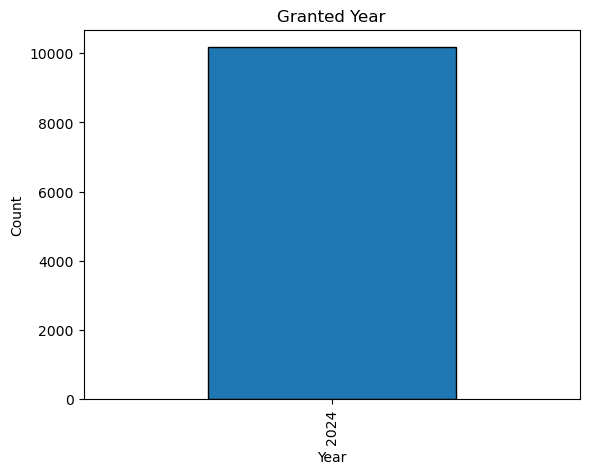

In [21]:
year_counts = df['year'].value_counts().sort_index()
year_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Granted Year')
plt.show()

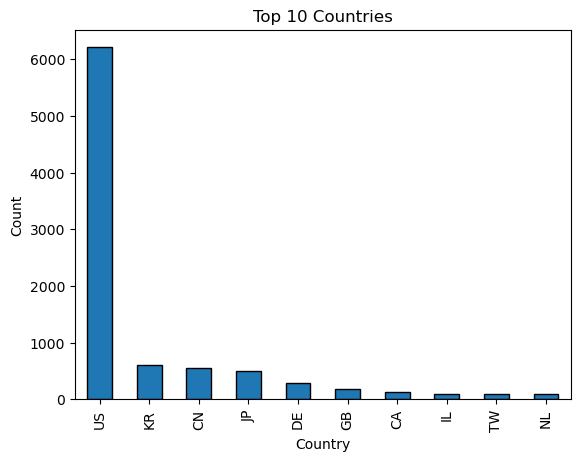

In [22]:
top10_countries = df['country'].value_counts().iloc[:10]
top10_countries.plot(kind='bar', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries')
plt.show()

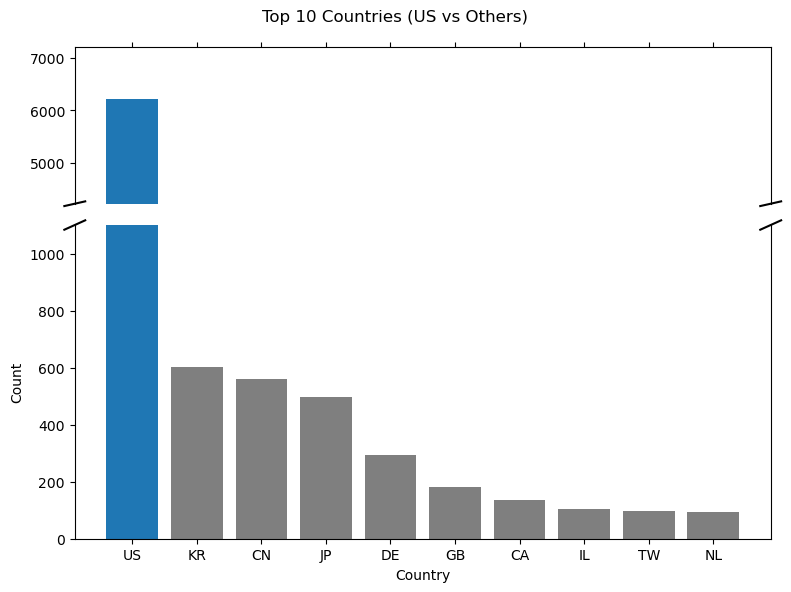

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# 예시 데이터 (실제 top10_countries로 대체)
top10_countries = df['country'].value_counts().iloc[:10]

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,6), height_ratios=[1,2])

# US bar만 위쪽(상단), 나머지는 아래쪽(하단)에 강조
bars = ax.bar(top10_countries.index, top10_countries, color=['tab:blue'] + ['tab:gray']*9)
bars2 = ax2.bar(top10_countries.index, top10_countries, color=['tab:blue'] + ['tab:gray']*9)

# 상단 y축(US만 보이게)
ax.set_ylim(top10_countries['US']-2000, top10_countries['US']+1000)
# 하단 y축(나머지 9개만 보이게)
ax2.set_ylim(0, top10_countries[1:].max()+500)

# 축 숨기기
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # 상단 x축 레이블 숨기기
ax2.xaxis.tick_bottom()

# 축이 끊어진 표시 (사선)
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # 왼쪽
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 오른쪽
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

plt.xlabel('Country')
ax2.set_ylabel('Count')
plt.suptitle('Top 10 Countries (US vs Others)')
plt.tight_layout()
plt.show()


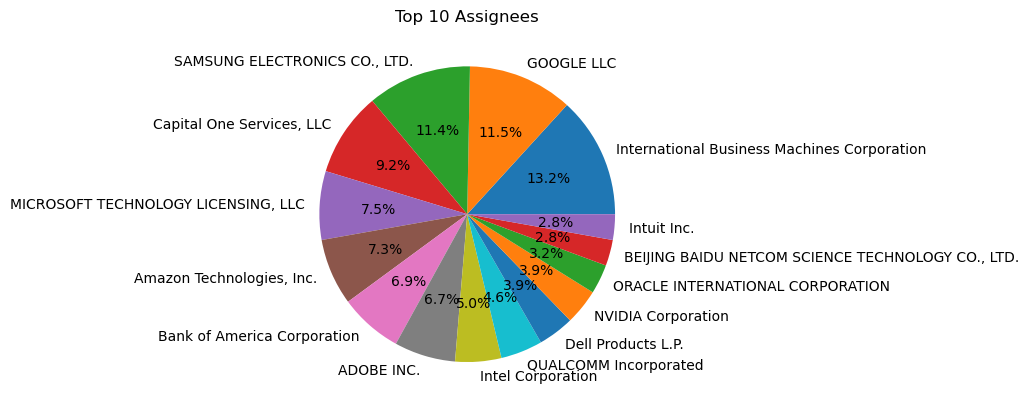

In [24]:
# assignee 컬럼에서 상위 30개 추출
top30_assignees = df['assignee'].value_counts().iloc[:15]
top30_assignees.plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.ylabel('')
plt.title('Top 10 Assignees')
plt.show()

In [25]:
distinct_ipcs = set()
for cell in df['ipc'].dropna():
    codes = [code.strip() for code in cell.split(',') if code.strip()]
    distinct_ipcs.update(codes)

num_distinct_ipcs = len(distinct_ipcs)
print(f"중복되지 않는 ipc의 총 개수: {num_distinct_ipcs}")

중복되지 않는 ipc의 총 개수: 961


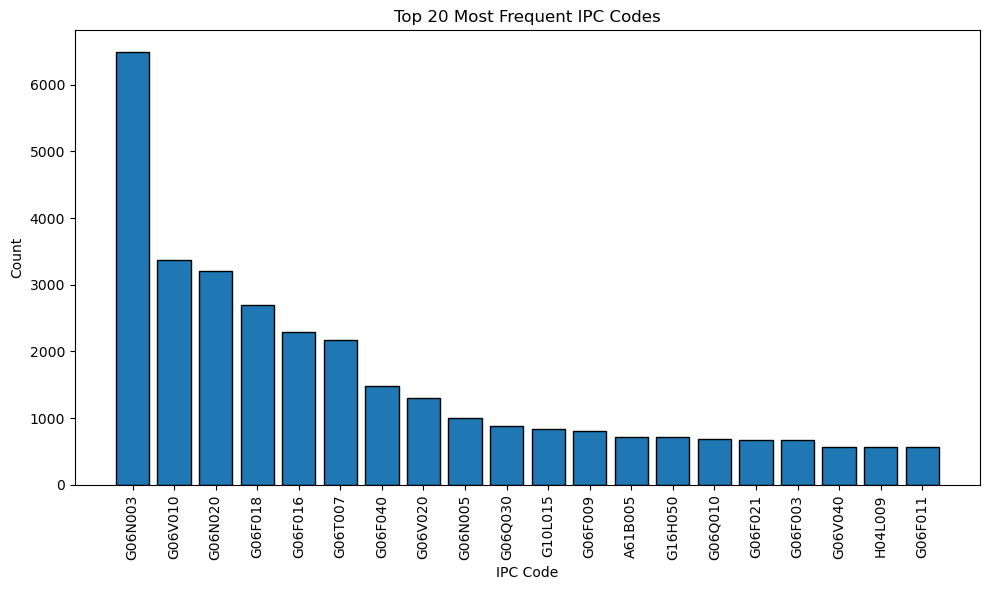

In [27]:
from collections import Counter
import matplotlib.pyplot as plt

ipc_counter = Counter()
for cell in df['ipc'].dropna():
    codes = [code.strip() for code in cell.split(',') if code.strip()]
    ipc_counter.update(codes)

# 상위 20개 추출
top20_ipc = ipc_counter.most_common(20)
codes, counts = zip(*top20_ipc)

plt.figure(figsize=(10,6))
plt.bar(codes, counts, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('IPC Code')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent IPC Codes')
plt.tight_layout()
plt.show()

## IPC co-occurrence

In [28]:
# 모든 IPC 코드 추출 및 중복 제거
all_ipcs = set()
for ipcs in df['ipc'].dropna():
    codes = [code.strip() for code in ipcs.split(',')]
    all_ipcs.update(codes)

# 정렬된 고유 IPC 코드 목록
unique_ipcs = sorted(list(all_ipcs))

### unweighted

In [ ]:
import numpy as np

# 특허-IPC 이진 행렬 생성 (Matrix P)
matrix_p = pd.DataFrame(0, index=df.index, columns=unique_ipcs)

# 각 특허에 대해 해당하는 IPC 코드를 1로 표시
for idx, row in df.iterrows():
    if pd.isna(row['ipc']):
        continue
    
    ipcs = [code.strip() for code in row['ipc'].split(',')]
    for ipc in ipcs:
        if ipc in unique_ipcs:  # 유효한 IPC 코드인지 확인
            matrix_p.loc[idx, ipc] = 1

In [ ]:
# Co-occurrence matrix 생성 (Matrix C = P^T P)
matrix_c = matrix_p.T.dot(matrix_p)

In [ ]:
# 정규화된 Matrix U 생성 (Unweighted graph)
matrix_u = matrix_c.copy()

# 대각선 값을 0으로 설정하여 자기 자신과의 관계 제거
np.fill_diagonal(matrix_u.values, 0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 행렬 크기가 너무 크면 상위 n개만 선택
if len(matrix_c) > 20:
    # 가장 빈도가 높은 상위 20개 IPC 코드 선택
    top_ipcs = matrix_c.sum().nlargest(20).index
    matrix_c_vis = matrix_c.loc[top_ipcs, top_ipcs]
else:
    matrix_c_vis = matrix_c

# 히트맵으로 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(matrix_c_vis, annot=True, cmap='YlGnBu', fmt='d')
plt.title('IPC Co-occurrence Matrix')
plt.tight_layout()
plt.show()

### weighted

In [29]:
import pandas as pd
from collections import Counter

# 고유한 IPC 코드 추출
unique_ipcs = set()
for ipcs in df['ipc'].dropna():
    codes = [code.strip() for code in ipcs.split(',')]
    unique_ipcs.update(codes)
unique_ipcs = sorted(list(unique_ipcs))

# 빈도 행렬 생성 (Matrix P)
matrix_p = pd.DataFrame(0, index=df.index, columns=unique_ipcs)

# 각 특허에 대해 IPC 코드의 빈도 계산
for idx, row in df.iterrows():
    if pd.isna(row['ipc']):
        continue
    
    ipcs = [code.strip() for code in row['ipc'].split(',')]
    # Counter를 사용하여 각 IPC 코드의 등장 횟수 계산
    ipc_counts = Counter(ipcs)
    
    for ipc, count in ipc_counts.items():
        if ipc in unique_ipcs:
            matrix_p.loc[idx, ipc] = count

In [30]:
matrix_p = matrix_p.astype(int)

In [31]:
matrix_p

,A01B039,A01B061,A01B063,A01B069,A01B079,A01C001,A01C021,A01D034,A01D041,A01D046,...,H10B053,H10B061,H10B063,H10B099,H10K010,H10K019,H10K085,H10N050,H10N060,H10N070
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
import numpy as np
from scipy import sparse

# 1. 희소 행렬로 변환
sparse_p = sparse.csr_matrix(matrix_p.astype(np.int32))  # 정수 타입 명시

# 2. 전치 행렬 계산
sparse_pt = sparse_p.T

# 3. 행렬곱 수행
sparse_c = sparse_pt.dot(sparse_p)

# 4. 필요시 일반 행렬로 변환
matrix_c = sparse_c.toarray()

In [33]:
col_names = matrix_p.columns.tolist()
df_c = pd.DataFrame(
    data=matrix_c,
    columns=col_names,  # 컬럼 이름 지정
    index=col_names     # 인덱스 이름도 동일하게 지정 (선택사항)
)

In [34]:
df_c.to_csv('adj_test.csv', encoding='utf-8-sig')

### Gephi에 활용할 수 있도록

In [25]:
import pandas as pd

# df_c는 이미 생성된 인접행렬 DataFrame (index와 columns가 동일)
node_labels = df_c.index.tolist()

# 1. 노드 리스트 생성
nodes = pd.DataFrame({
    'Id': node_labels,             # ID는 인접행렬의 인덱스 그대로 사용
    'Label': list(range(1, len(node_labels) + 1))  # Label은 1부터 순서대로 숫자 부여
})

# 2. 엣지 리스트 생성
edges = []
edge_id = 0

for source in node_labels:
    for target in node_labels:
        weight = df_c.loc[source, target]
        if weight > 0:
            edges.append({
                'Source': source,   # 노드 ID 그대로 사용
                'Target': target,
                'Type': 'Directed',
                'Id': edge_id,
                'Label': '',
                'timeset': '',
                'Weight': weight
            })
            edge_id += 1

edges_df = pd.DataFrame(edges)

# 3. CSV 저장 (필요시)
nodes.to_csv('nodes.csv', index=False)
edges_df.to_csv('edges.csv', index=False)

print("노드 및 엣지 리스트 생성 완료")
print(nodes.head())
print(edges_df.head())


노드 및 엣지 리스트 생성 완료
        Id  Label
0  A01B003      1
1  A01B039      2
2  A01B043      3
3  A01B049      4
4  A01B059      5
    Source   Target      Type  Id Label timeset  Weight
0  A01B003  A01B003  Directed   0                     1
1  A01B003  A01B049  Directed   1                     1
2  A01B003  A01B063  Directed   2                     1
3  A01B003  A01B076  Directed   3                     1
4  A01B003  A01B079  Directed   4                     1
